### Dataset과 Dataloader

데이터를 효율적으로 처리, 모델 학습을 위한 데이터 파이프라인 구축<br>
-> Pytorch에서 제공하는 데이터 로딩 및 전처리 기능을 제공, 모델 학습에 필요한 데이터를 배치 단위로 처리

#### 1. Dataset 클래스 : 데이터 로딩과 전처리 담당, 사용자가 정의하는 데이터셋에 대한 인터페이스 제공 -> 샘플과 정답을 저장
- len() : 데이터셋의 전체 샘플 개수 반환
- getitem(idx) : 인덱스 idx에 해당하는 샘플을 가져오는 메서드

In [1]:
import torch
from torch.utils.data import Dataset
from PIL import Image


# 이미지 파일의 경로와 레이블을 입력받아 이미지 데이터와 레이블을 텐서로 변환하여 반환
class CustomImageDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        """
            커스텀 이미지 데이터셋 클래스의 생성자

            Args:
                file_paths (list) : 이미지 파일 경로의 리스트
                labels (list) : 이미지 레이블의 리스트
                transform (callable, optional) : 이미지에 적용할 전처리 함수
        """
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        """
            데이터셋의 전체 샘플 개수를 반환
        """
        return len(self.file_paths)

    def __getitem__(self, idx):
        """
            인덱스에 해당하는 샘플을 가져옴

            Args:
                idx (int) : 샘플의 인덱스

            Returns:
                image (torch.Tensor) : 이미지 데이터의 텐서
                label (torch.Tensor) : 이미지 레이블의 텐서
        """

        # 이미지 파일을 불러옴
        image = Image.open(self.file_paths[idx])

        # 이미지 전처리 함수를 적용 (예 : Resize, RandomCrop, ToTensor 등)
        if self.transform is not None:
            image = self.transform(image)

        # 이미지 레이블을 텐서로 변환
        label = torch.tensor(self.labels[idx])

        return image, label

##### 1) Custom Dataset과 transforms

In [2]:
# torchvision..transforms을 사용하여 이미지 전처리 작업을 정의

import torchvision.transforms as T

img_T = T.Compose([
    T.Resize((256, 256)), # 이미지를 256x256 픽셀로 크기를 고정
    T.RandomHorizontalFlip(), # 이미지를 랜덤하게 수평으로 뒤집음 -> 데이터 증강 기법
    T.ToTensor(), # 이미지를 텐서로 변환, [0,255] -> [0,1]로 정규화
    T.Normalize((0.5,), (0.5,)) # 텐서의 각 채널을 평균이 0.5이고 표준편차가 0.5인 정규분포로 변환
])

In [3]:
from torch.utils.data import Dataset
from PIL import Image

class CustomImageDataset(Dataset):
    def __init__(self, file_list, labels_list, img_T = None):
        self.file_list = file_list
        self.labels_list = labels_list
        self.img_T = img_T

    # 이미지에 transforms 적용
    def __getitem__(self, idx):
        image = Image.open(self.file_list[idx])
        label = self.labels_list[idx]

        if self.img_T is not None:
            image = self.img_T(image)
        
        return image, label

    def __len__(self):
        return len(self.file_list)

CustomImageDataset 클래스의 <code>__getitem__</code> 메서드에서 이미지 데이터에 self.img_T를 적용 -> 텐서와 레이블을 반환<br>
<br>
=> CustomImageDataset 클래스를 인스턴스화 할 때 img_T 인자에 torchvision.transforms에서 정의한 전처리 작업을 적용하여 이미지 데이터를 전처리 가능

CustomImageDataset 클래스 인스턴스 생성 : <code>dataset = CustomImageDataset(file_list, label_list, img_T=img_T)</code>

##### 2) torchvision.transforms : 이미지 데이터의 전처리 및 데이터 증강을 위해 제공하는 모듈

- Resize : 이미지 크기 조절
- RandomResizedCrop : 이미지를 무작위로 자르고 크기 조절
- RandomHorizontalFlip : 이미지를 무작위로 수평으로 뒤집음
- RandomVerticalFlip : 이미지를 무작위로 수직으로 뒤집음
- ToTensor : 이미지를 텐서로 변환
- Normalize : 이미지를 정규화
- ColorJitter : 이미지의 색상을 무작위로 조정
- RandomRotation : 이미지를 무작위로 회전
- RandomCrop : 이미지를 무작위로 자름
- Grayscale : 이미지를 흑백으로 변환
- RandomSizedCrop : 이미지를 무작위로 자르고 크기 조절

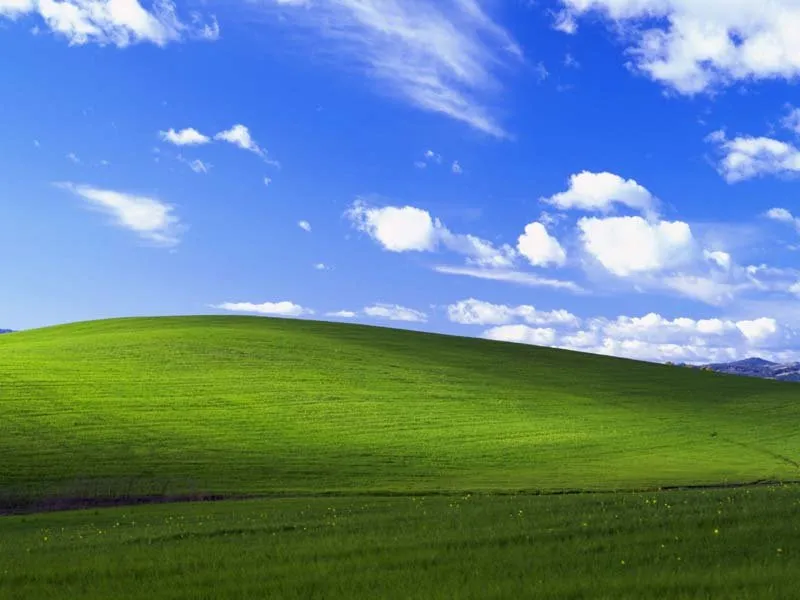

In [4]:
import torchvision.transforms as T
from PIL import Image

# 이미지 전처리 작업을 정의
preprocess = T.Compose([
    T.Resize((256, 256)), # 256x256 사이즈,   256 1개만 쓰면 256으로 하고 종횡비 유지
    T.RandomHorizontalFlip(), # 무작위로 뒤집음
    T.ToTensor(),
    T.Normalize([0.5, ], [0.5]) # T.Normalize((0.5,), (0.5,))
])

# 이미지 전처리 작업을 수행
image = Image.open('image/image.jpg')
imge = preprocess(image)
image

In [5]:
imge

tensor([[[ 0.5922,  0.5922,  0.6078,  ...,  0.8902,  0.8667,  0.8588],
         [ 0.5765,  0.5843,  0.6000,  ...,  0.8510,  0.8196,  0.8196],
         [ 0.6000,  0.6078,  0.6235,  ...,  0.7176,  0.6784,  0.7020],
         ...,
         [-0.5843, -0.6000, -0.6235,  ..., -0.5843, -0.5686, -0.5451],
         [-0.6078, -0.6157, -0.6471,  ..., -0.5922, -0.5765, -0.5686],
         [-0.6392, -0.6392, -0.6549,  ..., -0.5922, -0.5765, -0.5765]],

        [[ 0.7255,  0.7255,  0.7176,  ...,  0.8902,  0.8824,  0.8902],
         [ 0.7098,  0.7098,  0.7020,  ...,  0.8980,  0.8824,  0.8980],
         [ 0.7333,  0.7255,  0.7176,  ...,  0.8275,  0.8039,  0.8353],
         ...,
         [-0.4275, -0.4353, -0.4588,  ..., -0.4353, -0.4196, -0.3961],
         [-0.4431, -0.4588, -0.4824,  ..., -0.4431, -0.4196, -0.4118],
         [-0.4745, -0.4745, -0.4902,  ..., -0.4510, -0.4275, -0.4196]],

        [[ 0.9137,  0.9137,  0.9137,  ...,  0.9373,  0.9216,  0.9137],
         [ 0.8980,  0.8980,  0.8980,  ...,  0

##### 3) torchvision.utils.save_image : 이미지 텐서를 파일로 저장하는 함수 -> 딥러닝 모델이 생성한 이미지를 저장할 때 사용
<code>torchvision.utils.save_image(tensor, filename, nrow=8, padding=2, normalize=False, range=None, scale_each=False, pad_value=0)</code>
<br>
- tensor (Tensor) : 저장할 이미지 텐서, shape는 (batch_size, channels, height, width)이어야 함
- filename (str) : 저장할 파일의 경로와 이름
- nrow (int, optional) : 저장할 이미지들을 한 줄에 몇개씩 보여줄 것인지 결정, 기본값은 8
- padding (int, optional) : 이미지들 사이의 간격을 몇 개의 픽셀로 할 것인지 결정하는 인자, 기본값은 2
- normalize (bool, optional) : 이미지의 값을 [0, 1]로 정규화할 것인지 결정하는 인자, 기본값은 True
- range (tuple, optional) : 이미지를 정규화할 때 사용할 범위를 결정하는 인자, 기본값은 None, 입력된 텐서의 값 범위를 그대로 사용
- scale_each (bool, optional) : 이미지를 정규화할 때 각 이미지마다 다른 범위를 사용할지 여부를 결정하는 인자, 기본값은 False
- pad_value (float, optional) : 이미지의 테두리를 채우는 값

In [6]:
import torch
import torchvision.utils as vutils

# sing RGB 이미지를 대표하는 (3, 64, 64) 모양은 텐서 생성
img = torch.rand(3, 64, 64)

# 이미지를 파일로 저장
vutils.save_image(img, 'my_image.jpg')
img

tensor([[[0.7327, 0.1448, 0.3243,  ..., 0.2322, 0.0939, 0.7972],
         [0.3316, 0.9765, 0.7711,  ..., 0.2263, 0.6798, 0.8851],
         [0.1831, 0.6240, 0.2744,  ..., 0.1669, 0.7755, 0.1416],
         ...,
         [0.0267, 0.9858, 0.0144,  ..., 0.4265, 0.9744, 0.9336],
         [0.7107, 0.8895, 0.7812,  ..., 0.4237, 0.9885, 0.5886],
         [0.1618, 0.0469, 0.8271,  ..., 0.7288, 0.2489, 0.1027]],

        [[0.5520, 0.5947, 0.4274,  ..., 0.5029, 0.8559, 0.3372],
         [0.5155, 0.1758, 0.4133,  ..., 0.6764, 0.6628, 0.8364],
         [0.5768, 0.3317, 0.0827,  ..., 0.5039, 0.2391, 0.0853],
         ...,
         [0.7403, 0.2081, 0.7734,  ..., 0.6735, 0.3361, 0.9831],
         [0.1890, 0.5340, 0.6088,  ..., 0.0624, 0.4986, 0.3876],
         [0.8484, 0.3377, 0.6992,  ..., 0.0764, 0.8754, 0.5110]],

        [[0.9429, 0.3297, 0.5266,  ..., 0.2874, 0.1490, 0.1332],
         [0.6610, 0.8123, 0.0018,  ..., 0.4176, 0.6756, 0.5724],
         [0.3995, 0.5282, 0.9881,  ..., 0.0106, 0.5218, 0.

#### 2. DataLoader : 데이터 로딩 유틸리티, 모델 학습 시 데이터를 배치(batch) 단위로 로드 -> Dataset을 순회 가능한 객체로 감쌈, 효율적인 학습
- dataset : 데이터를 로드할 데이터셋 객체를 지정, torch.utils.data.Dataset 클래스를 상속받은 사용자 정의 데이터셋 클래스를 사용하거나, torchvision의 내장 데이터셋 클래스를 사용 가능(기본값 : None)
- batch_size : 한 번에 로드할 배치의 크기를 지정, 작은 배치 크기는 더 많은 메모리를 사용하지만 더 자주 모델이 업데이트&더 높은 학습 속도(기본값 : 1)
- shuffle : 데이터를 섞을지 여부, True : 데이터가 매 에폭(epoch)마다 섞여서 모델이 각 배치에서 다양한 데이터를 학습(기본값 : False)
- num_workers : 데이터 로딩에 사용할 워커(worker)의 수를 지정, 병렬 처리를 통해 데이터 로딩 속도 향상(기본값 : 0)
- pin_memory : GPU 메모리에 데이터를 고정할 지 여부를 지정, GPU를 사용하는 경우 True로 설정하면 학습 속도 향상(기본값 : False)
- collate_fn : 배치를 생성하기 전에 데이터를 결합하는 함수를 지정, 데이터셋이 출력하는 원시 데이터의 리스트를 배치로 결합(기본값 : None)
- drop_last : 마지막 배치의 크기가 batch_size보다 작을 경우 해당 배치를 무시할지 여부, True일 경우 마지막 배치 무시(기본값 : None)
<br><br>반복 가능한 객체 -> for 루프를 사용하여 데이터를 배치 단위로 간단하게 로드 가능

In [7]:
from torch.utils.data import DataLoader

# CustomImageDataset 객체 생성
dataset = CustomImageDataset(file_list, label_list, transform = transform)

# DataLoager 생성
dataloader = DataLoader(dataset, batch_size = 32, shuffle=True, num_workers = 4)

# 데이터 로딩을 위한 반복분
for images, labels in dataloader:
    # images와 labels를 이용하여 모델 학습 수행
    pass

NameError: name 'file_list' is not defined

### 실습

In [8]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data", # 학습/테스트 데이터가 저장되는 경우
    train=True, # 학습용 또는 테스트용 데이터셋 여부
    download=True, # root에 데이터가 없는 경우 인터넷에서 다운로드
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

print(training_data, test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


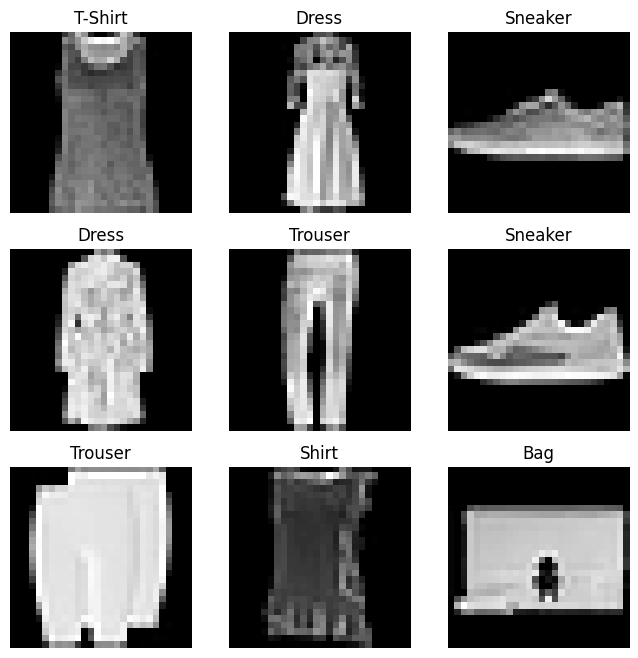

39224 60000 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0

In [9]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

print(sample_idx, len(training_data), img, label)

In [10]:
# 파일에서 사용자 정의 데이터셋 만들기
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self): # 데이터셋의 샘플 개수 반환
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])

        image = read_image(img_path) # 이미지를 텐서로 변환
        label = self.img_labels.iloc[idx, 1] # 정답(label)을 저장

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [11]:
# DataLoader로 학습용 데이터 준비하기
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


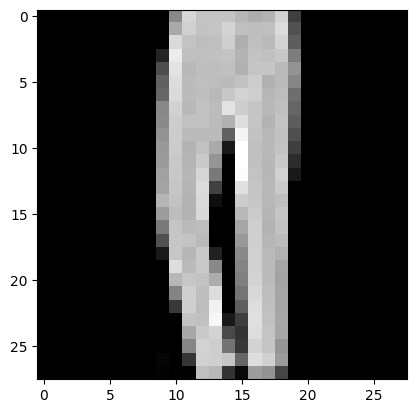

Label: 1


In [12]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")